## TAsk 2 - Linear filtering

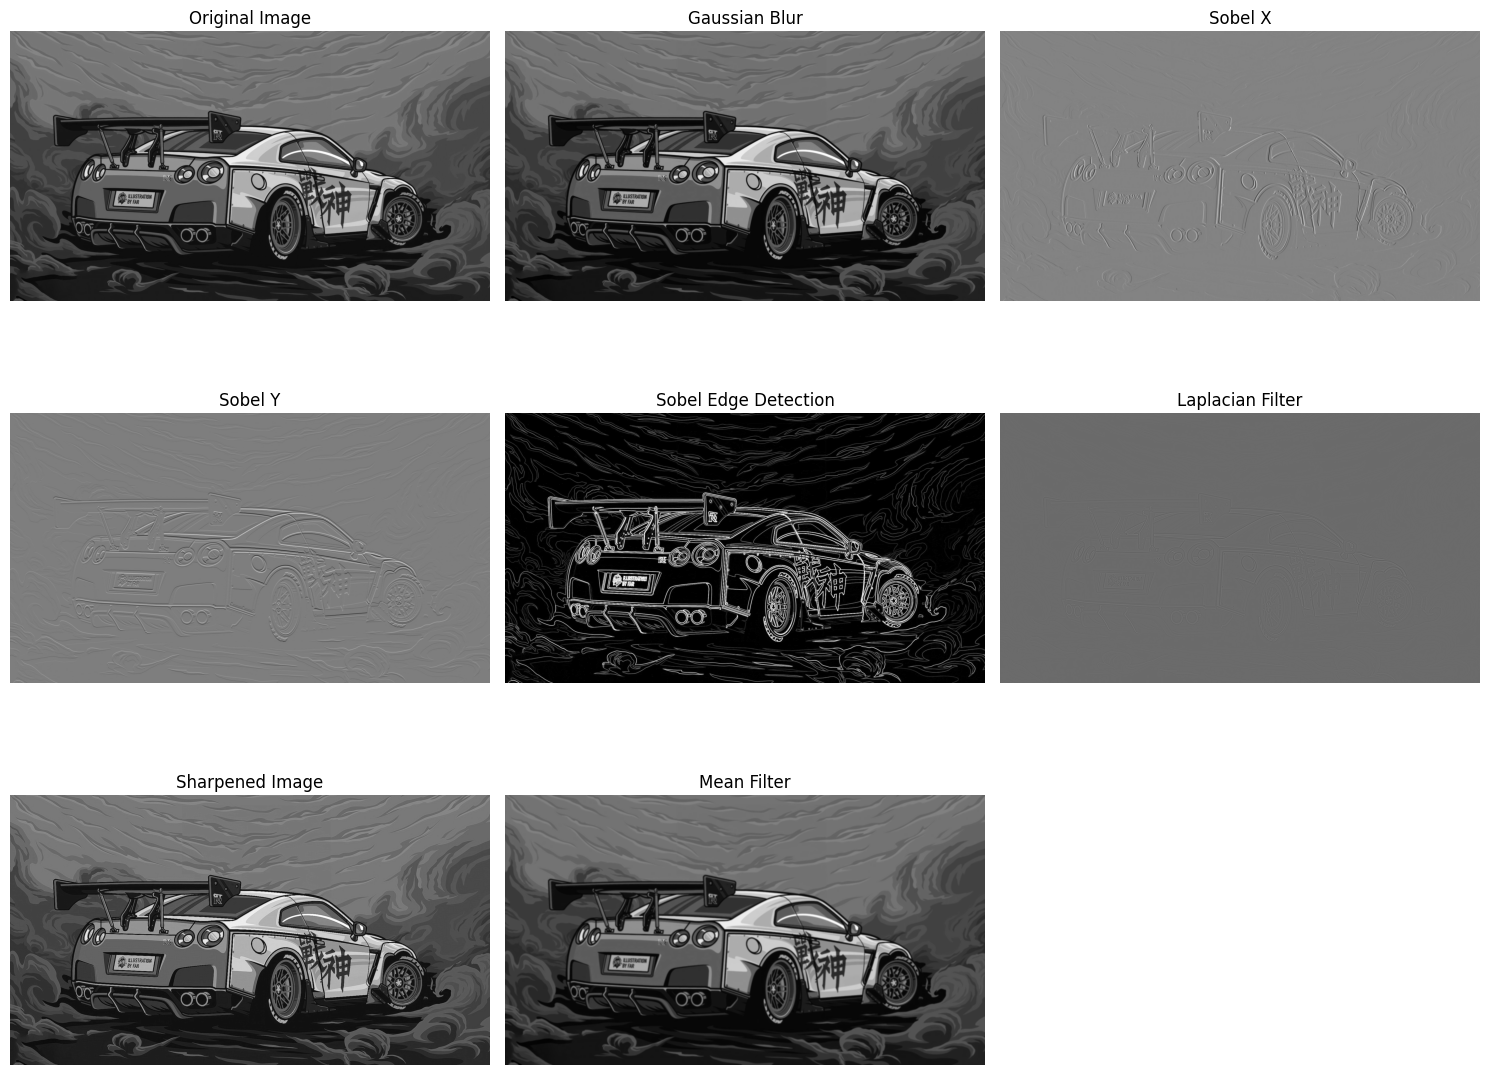

True

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('/content/gtr Artisitic Skin.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

gaussian_kernel = np.array([[1, 2, 1],
                           [2, 4, 2],
                           [1, 2, 1]], dtype=np.float32) / 16
gaussian_blur = cv2.filter2D(gray, -1, gaussian_kernel)

sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]], dtype=np.float32)
sobel_y = np.array([[-1, -2, -1],
                    [0, 0, 0],
                    [1, 2, 1]], dtype=np.float32)

edge_x = cv2.filter2D(gray, cv2.CV_32F, sobel_x)
edge_y = cv2.filter2D(gray, cv2.CV_32F, sobel_y)
edge_magnitude = np.sqrt(edge_x**2 + edge_y**2)
edge_magnitude = np.uint8(np.clip(edge_magnitude, 0, 255))

laplacian_kernel = np.array([[0, -1, 0],
                            [-1, 4, -1],
                            [0, -1, 0]], dtype=np.float32)
laplacian = cv2.filter2D(gray, cv2.CV_32F, laplacian_kernel)
sharpened = gray.astype(np.float32) + laplacian
sharpened = np.uint8(np.clip(sharpened, 0, 255))

mean_kernel = np.ones((5, 5), dtype=np.float32) / 25
mean_filtered = cv2.filter2D(gray, -1, mean_kernel)

plt.figure(figsize=(15, 12))

plt.subplot(3, 3, 1)
plt.imshow(gray, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(3, 3, 2)
plt.imshow(gaussian_blur, cmap='gray')
plt.title('Gaussian Blur')
plt.axis('off')

plt.subplot(3, 3, 3)
plt.imshow(edge_x, cmap='gray')
plt.title('Sobel X')
plt.axis('off')

plt.subplot(3, 3, 4)
plt.imshow(edge_y, cmap='gray')
plt.title('Sobel Y')
plt.axis('off')

plt.subplot(3, 3, 5)
plt.imshow(edge_magnitude, cmap='gray')
plt.title('Sobel Edge Detection')
plt.axis('off')

plt.subplot(3, 3, 6)
plt.imshow(laplacian, cmap='gray')
plt.title('Laplacian Filter')
plt.axis('off')

plt.subplot(3, 3, 7)
plt.imshow(sharpened, cmap='gray')
plt.title('Sharpened Image')
plt.axis('off')

plt.subplot(3, 3, 8)
plt.imshow(mean_filtered, cmap='gray')
plt.title('Mean Filter')
plt.axis('off')

plt.tight_layout()
plt.show()

cv2.imwrite('gaussian_blur.jpg', gaussian_blur)
cv2.imwrite('sobel_edges.jpg', edge_magnitude)
cv2.imwrite('sharpened.jpg', sharpened)
cv2.imwrite('mean_filtered.jpg', mean_filtered)

## Task 3 - Non Linear Filtering

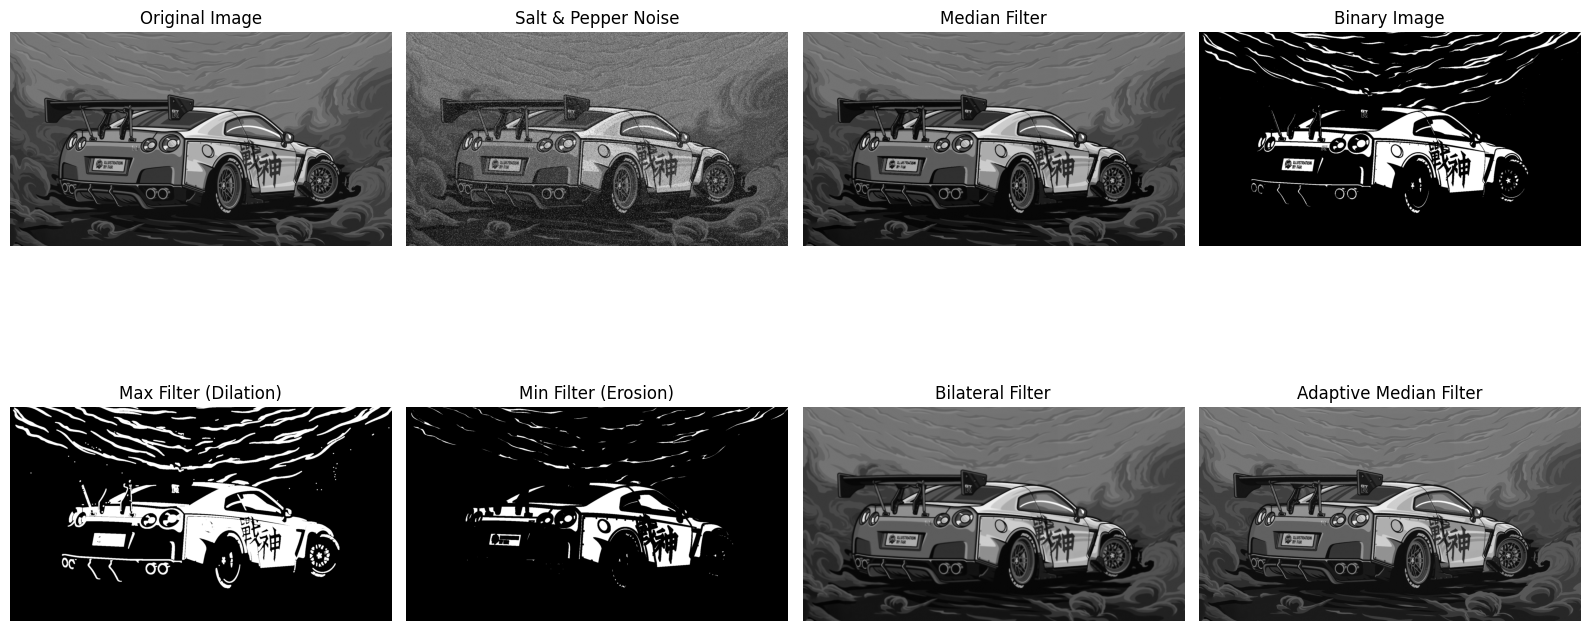

True

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('/content/gtr Artisitic Skin.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

noisy = gray.copy()
salt_pepper = np.random.random(gray.shape)
noisy[salt_pepper < 0.05] = 0
noisy[salt_pepper > 0.95] = 255

median_filtered = cv2.medianBlur(noisy, 5)

_, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

kernel = np.ones((5,5), np.uint8)
max_filtered = cv2.dilate(binary, kernel, iterations=1)

min_filtered = cv2.erode(binary, kernel, iterations=1)

bilateral_filtered = cv2.bilateralFilter(gray, 9, 75, 75)

def adaptive_median_filter(img, max_window_size=7):
    result = img.copy().astype(np.float64)
    img_float = img.astype(np.float64)
    h, w = img.shape

    for i in range(h):
        for j in range(w):
            window_size = 3

            while window_size <= max_window_size:
                half_size = window_size // 2

                top = max(0, i - half_size)
                bottom = min(h, i + half_size + 1)
                left = max(0, j - half_size)
                right = min(w, j + half_size + 1)

                window = img_float[top:bottom, left:right]

                z_min = float(np.min(window))
                z_max = float(np.max(window))
                z_med = float(np.median(window))
                z_xy = float(img_float[i, j])

                A1 = z_med - z_min
                A2 = z_med - z_max

                if A1 > 0 and A2 < 0:
                    B1 = z_xy - z_min
                    B2 = z_xy - z_max

                    if B1 > 0 and B2 < 0:
                        result[i, j] = z_xy
                    else:
                        result[i, j] = z_med
                    break
                else:
                    window_size += 2

                if window_size > max_window_size:
                    result[i, j] = z_med

    return result.astype(np.uint8)

adaptive_median = adaptive_median_filter(noisy)

plt.figure(figsize=(16, 12))

plt.subplot(3, 4, 1)
plt.imshow(gray, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(3, 4, 2)
plt.imshow(noisy, cmap='gray')
plt.title('Salt & Pepper Noise')
plt.axis('off')

plt.subplot(3, 4, 3)
plt.imshow(median_filtered, cmap='gray')
plt.title('Median Filter')
plt.axis('off')

plt.subplot(3, 4, 4)
plt.imshow(binary, cmap='gray')
plt.title('Binary Image')
plt.axis('off')

plt.subplot(3, 4, 5)
plt.imshow(max_filtered, cmap='gray')
plt.title('Max Filter (Dilation)')
plt.axis('off')

plt.subplot(3, 4, 6)
plt.imshow(min_filtered, cmap='gray')
plt.title('Min Filter (Erosion)')
plt.axis('off')

plt.subplot(3, 4, 7)
plt.imshow(bilateral_filtered, cmap='gray')
plt.title('Bilateral Filter')
plt.axis('off')

plt.subplot(3, 4, 8)
plt.imshow(adaptive_median, cmap='gray')
plt.title('Adaptive Median Filter')
plt.axis('off')

plt.tight_layout()
plt.show()

cv2.imwrite('noisy_image.jpg', noisy)
cv2.imwrite('median_filtered.jpg', median_filtered)
cv2.imwrite('max_filtered.jpg', max_filtered)
cv2.imwrite('min_filtered.jpg', min_filtered)
cv2.imwrite('bilateral_filtered.jpg', bilateral_filtered)
cv2.imwrite('adaptive_median.jpg', adaptive_median)